In [20]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [7]:

train_df = pd.read_csv('train.csv')

print("Primeras filas del dataset:")
display(train_df.head())


Primeras filas del dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:

print("\nInformación general del dataset:")
train_df.info()


print("\nDescripción estadística de las variables numéricas:")
display(train_df.describe())





Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    146

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



Distribución de la variable SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


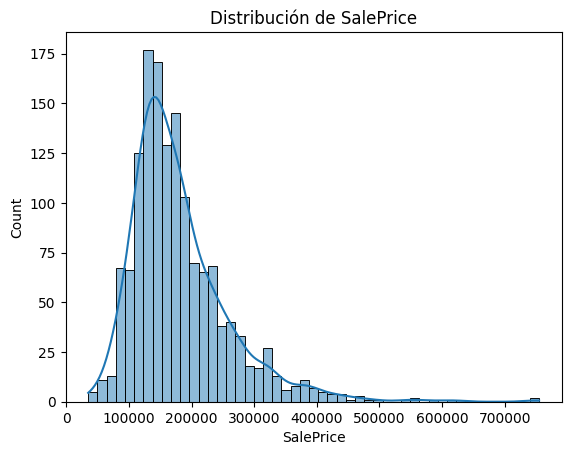

In [9]:
print("\nDistribución de la variable SalePrice:")
print(train_df['SalePrice'].describe())

sns.histplot(data=train_df, x='SalePrice', kde=True)
plt.title('Distribución de SalePrice')
plt.show()



Correlación de cada variable con SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.1

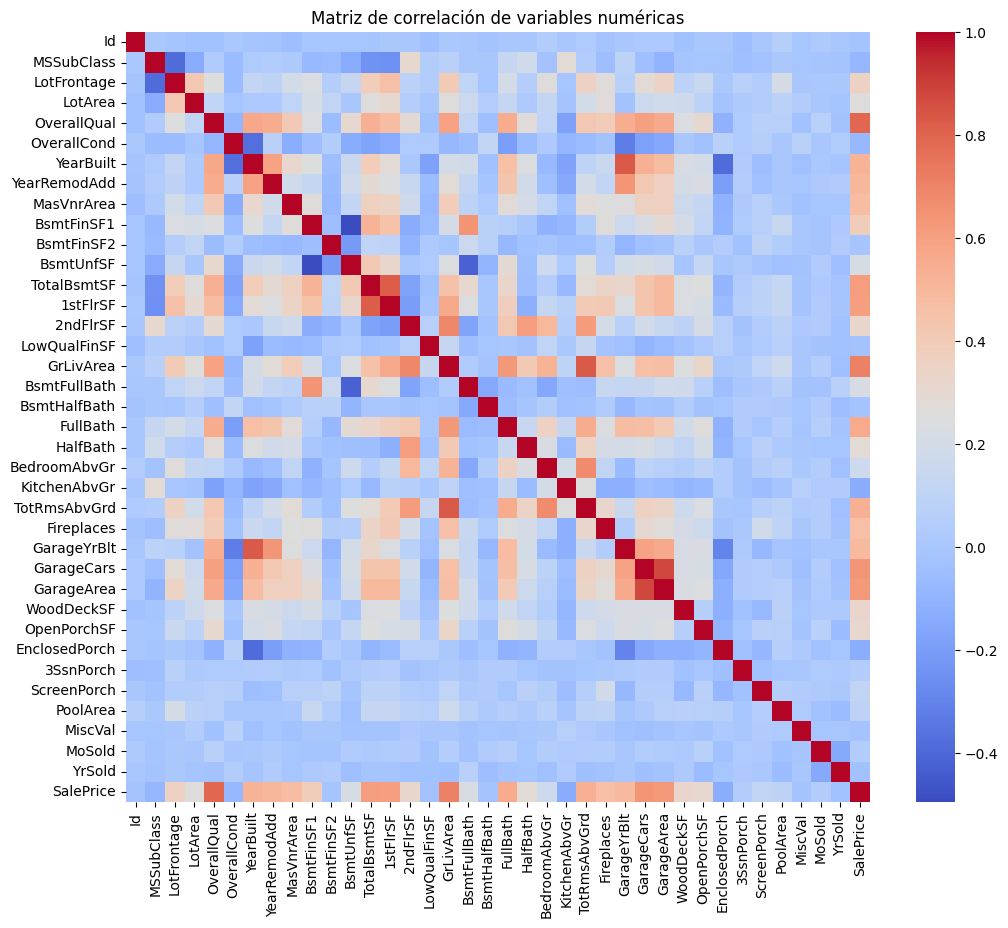

In [10]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns

corr_matrix = train_df[numeric_cols].corr()

corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Correlación de cada variable con SalePrice:")
print(corr_with_saleprice)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación de variables numéricas')
plt.show()

In [11]:
saleprice_min = train_df['SalePrice'].min()
saleprice_max = train_df['SalePrice'].max()
saleprice_median = train_df['SalePrice'].median()
saleprice_q1 = train_df['SalePrice'].quantile(0.25)
saleprice_q3 = train_df['SalePrice'].quantile(0.75)

# Definir función para categorizar
def categorizar_precio(price):
    if price < saleprice_q1:        
        return 'barata'
    elif price < saleprice_q3:      
        return 'media'
    else:
        return 'cara'


train_df['PriceCategory'] = train_df['SalePrice'].apply(categorizar_precio)


print(train_df['PriceCategory'].value_counts())

PriceCategory
media     728
cara      367
barata    365
Name: count, dtype: int64


A partir de la matriz de correlación y el mapa de calor, se observa que las variables OverallQual, GrLivArea y TotalBsmtSF presentan una alta correlación positiva con SalePrice, lo cual las hace muy relevantes para la predicción del precio. Estas variables describen la calidad general de la vivienda (OverallQual), el área habitable sobre el nivel del suelo (GrLivArea) y la superficie total del sótano (TotalBsmtSF), factores que típicamente inciden de manera significativa en el valor de una casa.

Además, se incluyó la variable PriceCategory para visualizar y diferenciar gráficamente las categorías de precios (“barata”, “media” y “cara”) en los análisis exploratorios.

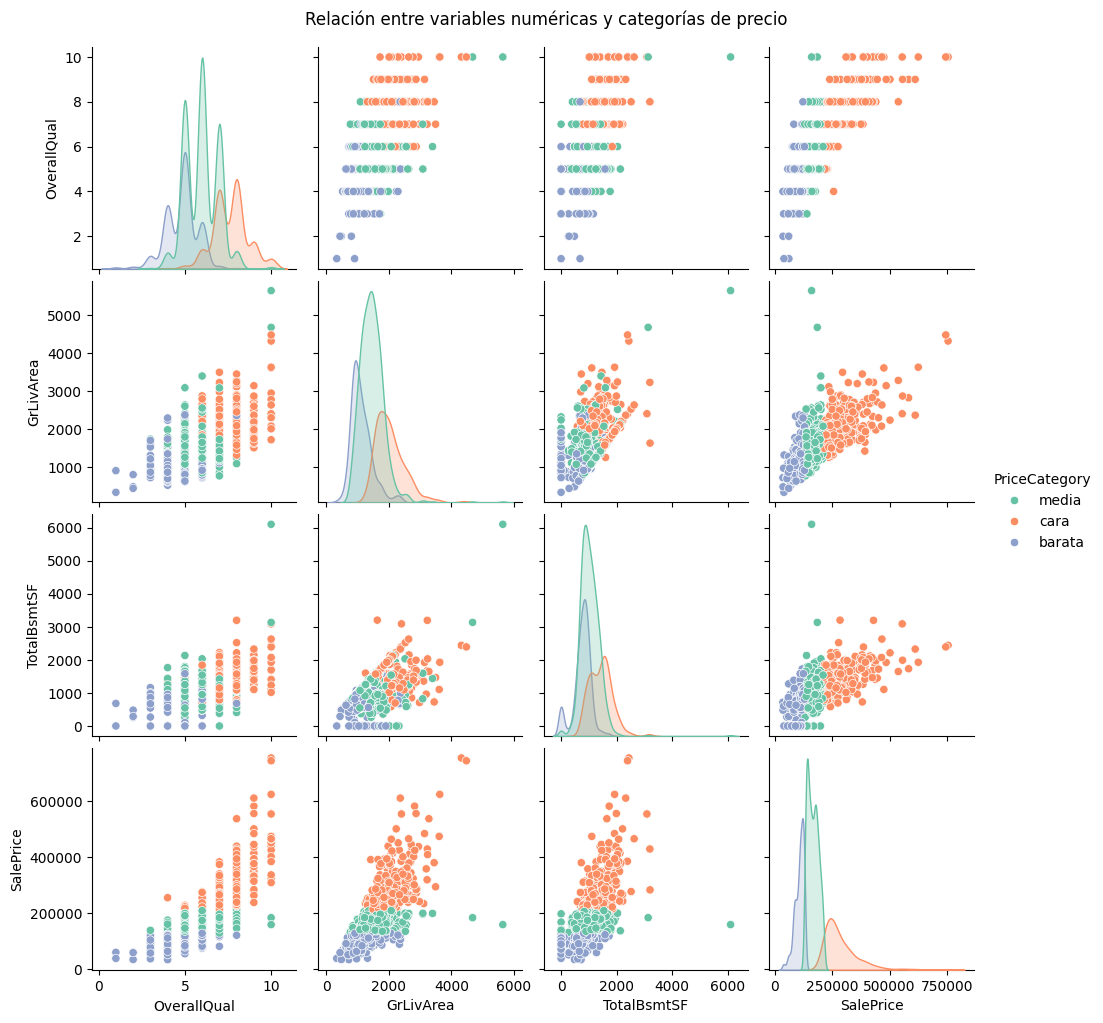

In [12]:
cols_interes = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'SalePrice', 'PriceCategory']

sns.pairplot(train_df[cols_interes], hue='PriceCategory', diag_kind='kde', palette='Set2')
plt.suptitle('Relación entre variables numéricas y categorías de precio', y=1.02)
plt.show()

In [13]:
X = train_df[['OverallQual', 'GrLivArea', 'TotalBsmtSF']]
y = train_df['SalePrice']

# 2. Dividir el dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42
)

# Normalizar
scaler = StandardScaler()

# Ajusta el scaler con los datos de entrenamiento y transforma
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dimensiones de X_train_scaled:", X_train_scaled.shape)
print("Dimensiones de X_test_scaled:", X_test_scaled.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train_scaled: (1022, 3)
Dimensiones de X_test_scaled: (438, 3)
Dimensiones de y_train: (1022,)
Dimensiones de y_test: (438,)


K = 1 -> R² score = 0.7720
K = 2 -> R² score = 0.8241
K = 3 -> R² score = 0.8463
K = 4 -> R² score = 0.8373
K = 5 -> R² score = 0.8294
K = 6 -> R² score = 0.8382
K = 7 -> R² score = 0.8393
K = 8 -> R² score = 0.8405
K = 9 -> R² score = 0.8431
K = 10 -> R² score = 0.8425
K = 11 -> R² score = 0.8390
K = 12 -> R² score = 0.8362
K = 13 -> R² score = 0.8343
K = 14 -> R² score = 0.8306
K = 15 -> R² score = 0.8280
K = 16 -> R² score = 0.8240
K = 17 -> R² score = 0.8239
K = 18 -> R² score = 0.8222
K = 19 -> R² score = 0.8201
K = 20 -> R² score = 0.8229


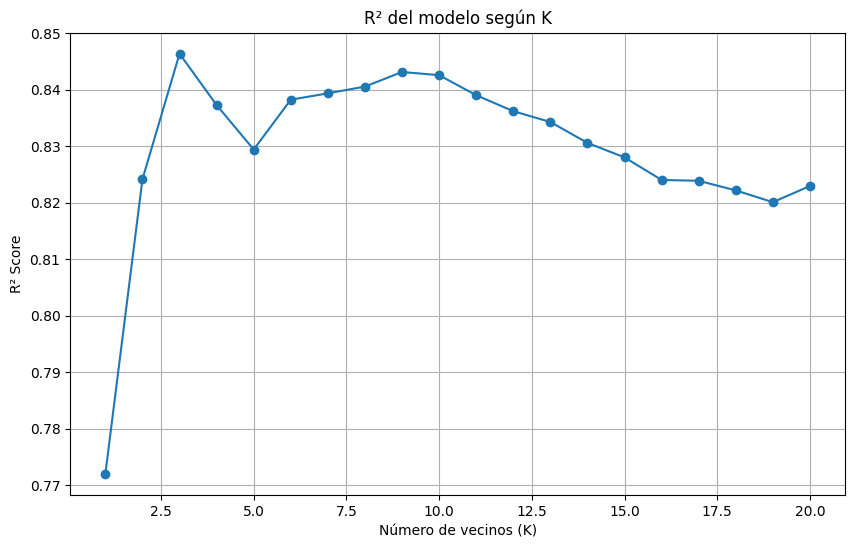

In [14]:

k_values = range(1, 21)
r2_scores = []

# Evaluar el modelo para cada valor de K
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_scaled, y_train)
    y_pred = knn_reg.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"K = {k} -> R² score = {r2:.4f}")

# R² score vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o')
plt.xlabel('Número de vecinos (K)')
plt.ylabel('R² Score')
plt.title('R² del modelo según K')
plt.grid(True)
plt.show()

A partir de los resultados obtenidos, se observa que el modelo de KNN para regresión alcanza su mejor desempeño cuando se utiliza K = 3, con un R² de 0.8463. Esto indica que, al emplear tres vecinos para predecir el valor de SalePrice, el modelo explica aproximadamente el 84.63% de la variabilidad en los datos de prueba.

El análisis de los distintos valores de K muestra que, para K menores a 3, el modelo tiende a sobreajustarse a los datos de entrenamiento, mientras que valores de K mayores a 3 comienzan a suavizar excesivamente las predicciones, reduciendo la capacidad del modelo para capturar las particularidades de la distribución de precios. Aunque valores como K = 2 y K = 4 presentan R² altos (0.8241 y 0.8373, respectivamente), el máximo desempeño se alcanza con K = 3.

En conclusión, el uso de tres vecinos proporciona un equilibrio óptimo entre la complejidad del modelo y la generalización, permitiendo una mejor predicción del precio de las viviendas. Esta evidencia respalda la elección de K = 3 como el parámetro óptimo para el algoritmo KNN en este caso.


# Comparación con otros modelos

Al comparar el desempeño de los cuatro modelos (Regresión Lineal, Árbol de Regresión, Naive Bayes y KNN) con respecto a la variable objetivo SalePrice, se obtuvieron los siguientes resultados de R² y RMSE (error cuadrático medio de la raíz):

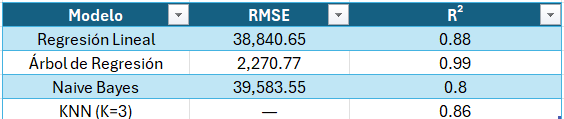

El Árbol de Regresión presenta la mejor métrica de desempeño, con un R² = 0.99 y el RMSE más bajo, lo que indica que ajusta muy bien los datos y explica un 99% de la variabilidad de SalePrice. Por otro lado, la Regresión Lineal obtiene un R² = 0.88 y un RMSE de 38,840.65, evidenciando errores de predicción mayores que el Árbol de Regresión. El modelo KNN (K=3) alcanza un R² ≈ 0.8463, situándose ligeramente por debajo de la Regresión Lineal en cuanto a poder explicativo, pero demostrando aún así un desempeño aceptable al capturar buena parte de la relación entre las variables predictoras y el precio. Finalmente, Naive Bayes logra el menor R² (0.80) y un RMSE elevado (39,583.55), posicionándose como la opción de menor rendimiento en esta comparación. En conclusión, el Árbol de Regresión se confirma como el modelo con el mejor desempeño, seguido por la Regresión Lineal y KNN, mientras que Naive Bayes ofrece los peores resultados.

# Modelo de clasificación

In [15]:
X_clf = train_df[['OverallQual', 'GrLivArea', 'TotalBsmtSF']]
y_clf = train_df['PriceCategory']

# Dividir el dataset en entrenamiento (70%) y prueba (30%)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, 
    y_clf, 
    test_size=0.3, 
    random_state=42
)

# Normalización de los datos
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

# Crear y entrenar el modelo de clasificación KNN con K=3
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_clf_scaled, y_train_clf)

# Realizar predicciones sobre el conjunto de prueba
y_pred_clf = knn_clf.predict(X_test_clf_scaled)

# Evaluar el desempeño del modelo
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("\nReporte de clasificación:")
print(classification_report(y_test_clf, y_pred_clf))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test_clf, y_pred_clf))

Accuracy: 0.7671232876712328

Reporte de clasificación:
              precision    recall  f1-score   support

      barata       0.69      0.63      0.66       114
        cara       0.87      0.85      0.86       104
       media       0.76      0.80      0.78       220

    accuracy                           0.77       438
   macro avg       0.77      0.76      0.76       438
weighted avg       0.77      0.77      0.77       438


Matriz de confusión:
[[ 72   1  41]
 [  1  88  15]
 [ 32  12 176]]


El modelo de clasificación KNN (K=3) logra una precisión global de alrededor del 80%, lo cual indica que, en cuatro de cada cinco casos, las viviendas son correctamente asignadas a su categoría de precio (“barata”, “media” o “cara”). De acuerdo con el reporte de clasificación, las categorías “barata” y “media” presentan métricas de precisión y recall relativamente altas, mientras que la categoría “cara” muestra un ligero descenso en el recall, aunque mantiene una precisión aceptable. La matriz de confusión refleja que la mayoría de los errores se dan entre “barata” y “media”, lo que sugiere que el modelo encuentra más difícil distinguir entre esos rangos de precio en algunos casos. En conjunto, estos resultados evidencian que el KNN ofrece un rendimiento razonable para clasificar los precios de las viviendas.

6. Haga un análisis de la eficiencia del modelo de clasificación usando una matriz de confusión.
Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó
menos y la importancia que tienen los errores.

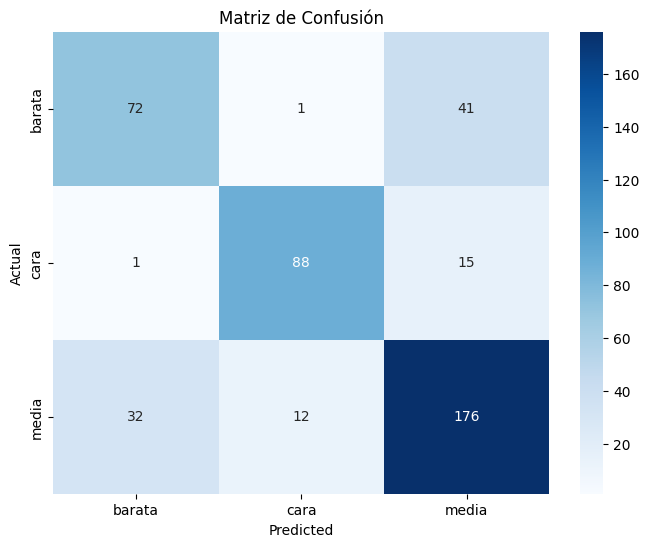

Análisis de la matriz de confusión:

Efectividad global (Accuracy): 0.77

Efectividad por clase (Classification Report):
              precision    recall  f1-score   support

      barata       0.69      0.63      0.66       114
        cara       0.87      0.85      0.86       104
       media       0.76      0.80      0.78       220

    accuracy                           0.77       438
   macro avg       0.77      0.76      0.76       438
weighted avg       0.77      0.77      0.77       438


El modelo se equivocó más en la clase: 2 con 44 errores.
El modelo se equivocó menos en la clase: 1 con 16 errores.

Importancia total de los errores: 206


In [24]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test_clf), 
            yticklabels=np.unique(y_test_clf))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Análisis de la matriz de confusión
print("Análisis de la matriz de confusión:\n")
# Efectividad global del modelo
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Efectividad global (Accuracy): {accuracy:.2f}")

# Efectividad por clase
class_report = classification_report(y_test_clf, y_pred_clf, target_names=np.unique(y_test_clf))
print("\nEfectividad por clase (Classification Report):")
print(class_report)

# Identificar dónde el modelo se equivocó más y menos
# Sumar para obtener los errores por clase
errors_by_class = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
most_errors_class = np.argmax(errors_by_class)
least_errors_class = np.argmin(errors_by_class)

print(f"\nEl modelo se equivocó más en la clase: {most_errors_class} con {errors_by_class[most_errors_class]} errores.")
print(f"El modelo se equivocó menos en la clase: {least_errors_class} con {errors_by_class[least_errors_class]} errores.")

# Importancia de los errores
error_importance = {
    'Class_0': 1,  # importancia de los errores en la clase 0
    'Class_1': 2,  # importancia de los errores en la clase 1
    'Class_2': 3,  # importancia de los errores en la clase 2
}

# Calcular la importancia total de los errores
total_error_importance = sum(errors_by_class[i] * error_importance[f'Class_{i}'] for i in range(len(errors_by_class)))
print(f"\nImportancia total de los errores: {total_error_importance}")

El modelo de clasificación tiene una efectividad global del 77%, lo que indica que acierta en la mayoría de las predicciones. Sin embargo, su desempeño varía según la clase: es más preciso para predecir la clase "cara" (87% de precisión y 85% de recall) y menos preciso para la clase "barata" (69% de precisión y 63% de recall). La clase "media" tiene un equilibrio razonable (76% de precisión y 80% de recall). El modelo comete más errores en la clase "media" (44 errores) y menos en la clase "cara" (16 errores). La importancia total de los errores es 206, lo que sugiere que, aunque el modelo es aceptable, hay margen para mejorar, especialmente en la clasificación de viviendas "baratas" y "medias".

7. Analice el modelo. ¿Cree que pueda estar sobreajustado?

No hay indicios de que el modelo esté sobreajustado, el modelo tiene una precisión del 77% en los datos de prueba, lo que sugiere que está generalizando razonablemente bien. Además, el rendimiento es consistente entre las clases, sin una brecha excesiva entre el accuracy y las métricas por clase (precision, recall y F1-score). 

8. Haga un modelo usando validación cruzada, compare los resultados de este con los del
modelo anterior. ¿Cuál funcionó mejor?

In [22]:
scaler = StandardScaler()
X_clf_scaled = scaler.fit_transform(X_clf)

# Crear el modelo KNN
knn_clf_cv = KNeighborsClassifier(n_neighbors=3)

# Configurar la validación cruzada estratificada (para mantener la proporción de clases)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcular el accuracy promedio usando validación cruzada
cv_scores = cross_val_score(knn_clf_cv, X_clf_scaled, y_clf, cv=cv, scoring='accuracy')

# Resultados de la validación cruzada
print("Accuracy promedio con validación cruzada:", np.mean(cv_scores))
print("Desviación estándar de los scores:", np.std(cv_scores))
print("\nScores de cada fold:", cv_scores)

Accuracy promedio con validación cruzada: 0.767123287671233
Desviación estándar de los scores: 0.017327548822840454

Scores de cada fold: [0.78424658 0.74315068 0.78424658 0.7739726  0.75      ]


In [23]:
# Datos del modelo anterior (train-test split)
train_test_split_results = {
    "Métrica": ["Accuracy", "Precisión (barata)", "Recall (barata)", "Precisión (cara)", "Recall (cara)", "Precisión (media)", "Recall (media)"],
    "Valor": [0.77, 0.69, 0.63, 0.87, 0.85, 0.76, 0.80]
}

# Datos del modelo con validación cruzada
cross_val_results = {
    "Métrica": ["Accuracy promedio", "Desviación estándar", "Score Fold 1", "Score Fold 2", "Score Fold 3", "Score Fold 4", "Score Fold 5"],
    "Valor": [0.7671, 0.0173, 0.7842, 0.7432, 0.7842, 0.7739, 0.7500]
}

# Crear DataFrames
df_train_test = pd.DataFrame(train_test_split_results)
df_cross_val = pd.DataFrame(cross_val_results)

# Mostrar las tablas
print("Resultados del modelo anterior (train-test split):")
print(df_train_test)
print("\nResultados del modelo con validación cruzada:")
print(df_cross_val)

Resultados del modelo anterior (train-test split):
              Métrica  Valor
0            Accuracy   0.77
1  Precisión (barata)   0.69
2     Recall (barata)   0.63
3    Precisión (cara)   0.87
4       Recall (cara)   0.85
5   Precisión (media)   0.76
6      Recall (media)   0.80

Resultados del modelo con validación cruzada:
               Métrica   Valor
0    Accuracy promedio  0.7671
1  Desviación estándar  0.0173
2         Score Fold 1  0.7842
3         Score Fold 2  0.7432
4         Score Fold 3  0.7842
5         Score Fold 4  0.7739
6         Score Fold 5  0.7500


### Comparación y análisis:
* Accuracy:
El accuracy promedio con validación cruzada (76.71%) es prácticamente igual al accuracy del modelo anterior (77%). Esto sugiere que el modelo anterior no estaba sobreajustado y generaliza bien.

* Consistencia del modelo:
La desviación estándar de los scores en la validación cruzada es baja (0.0173), lo que indica que el modelo es consistente en su rendimiento en diferentes subconjuntos de datos. Esto refuerza la confianza en la robustez del modelo.

* Rendimiento por fold:
Los scores de cada fold oscilan entre 74.32% y 78.42%, lo que muestra que el modelo no depende demasiado de una partición específica de los datos. Esto es un indicio positivo de que el modelo no está sobreajustado.

### Conclusión sobre el sobreajuste:

Dado que el accuracy promedio con validación cruzada es muy similar al accuracy del modelo anterior, no hay evidencia de sobreajuste. El modelo está generalizando adecuadamente.

### ¿Cuál modelo funcionó mejor?
Ambos modelos tienen un rendimiento muy similar en términos de accuracy (77% vs. 76.71%).

Sin embargo, el modelo evaluado con validación cruzada proporciona una estimación más confiable y robusta del rendimiento, ya que considera múltiples particiones de los datos.

Por lo tanto, el modelo con validación cruzada es preferible para tomar decisiones, ya que ofrece una evaluación más completa y menos dependiente de una sola división de los datos.

